# Dinâmica da Partícula - Exemplo 01
## Professor Paulo Victor

Obtenha as equações de movimento da partícula $P$, conforme mostrado na figura a seguir. Para a simulação considere os seguintes parâmetros: 
\
Ângulo inicial: $\theta = \dfrac{\pi}{3} rad$ 
\
Velocidade angular inicial: $\dot{\theta} = 0 rad/s$ 
\
Velocidade angular do tubo: $\omega = 10 rad/s$ 
\
Raio de curvatura do tubo: $r = 0.5m$ 
\
Gravidade: $g = 9.8 m/s^2$
\ 
Massa da partícula: $m = 1kg$ 
\

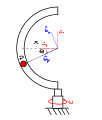

In [1]:
from IPython.core.display import SVG
SVG("cinetica01.svg")

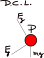

In [2]:
from IPython.core.display import SVG
SVG("cinetica02.svg")

In [3]:
import sympy as sy
import sympy.physics.mechanics as me

In [4]:
omega,r,m,g,F_y,F_z = sy.symbols('omega r m g F_y F_z')

In [5]:
alpha,theta = me.dynamicsymbols('alpha theta')

## Cinemática

In [6]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

In [7]:
A.orient(N,'Axis',[alpha,N.x])
A.set_ang_vel(N,omega*A.x)
B.orient(A,'Axis',[theta,A.z])

In [8]:
B.ang_vel_in(N)

omega*A.x + theta'*A.z

In [9]:
B.ang_acc_in(N)

- omega*theta'*A.y + theta''*A.z

In [10]:
O = me.Point('O')
O.set_vel(N,0)

In [11]:
P = me.Point('P')
P.set_pos(O,r*B.y)
P.set_vel(N,(r*B.y).dt(N))

In [12]:
P.vel(N)

- r*theta'*B.x + omega*r*cos(theta)*B.z

In [13]:
P.acc(N)

(-omega**2*r*sin(theta)*cos(theta) - r*theta'')*B.x + (-omega**2*r*cos(theta)**2 - r*theta'**2)*B.y - 2*omega*r*sin(theta)*theta'*B.z

## Cinética

In [14]:
Par = me.Particle('Par',P,m)

In [15]:
G = Par.linear_momentum(N)
G

- m*r*theta'*B.x + m*omega*r*cos(theta)*B.z

In [16]:
Gponto = G.dt(N)
Gponto

(-m*omega**2*r*sin(theta)*cos(theta) - m*r*theta'')*B.x + (-m*omega**2*r*cos(theta)**2 - m*r*theta'**2)*B.y - 2*m*omega*r*sin(theta)*theta'*B.z

In [17]:
R = F_y*B.y + F_z*B.z - m*g*N.x
R

- g*m*N.x + F_y*B.y + F_z*B.z

In [18]:
Eq_Mov = Gponto - R
Eq_Mov

g*m*N.x + (-m*omega**2*r*sin(theta)*cos(theta) - m*r*theta'')*B.x + (-F_y - m*omega**2*r*cos(theta)**2 - m*r*theta'**2)*B.y + (-F_z - 2*m*omega*r*sin(theta)*theta')*B.z

In [19]:
Eq_Mov_bx = Eq_Mov.dot(B.x)
Eq_Mov_bx

g*m*cos(theta(t)) - m*omega**2*r*sin(theta(t))*cos(theta(t)) - m*r*Derivative(theta(t), (t, 2))

In [20]:
Eq_Mov_by = Eq_Mov.dot(B.y)
Eq_Mov_by

-F_y - g*m*sin(theta(t)) - m*omega**2*r*cos(theta(t))**2 - m*r*Derivative(theta(t), t)**2

In [21]:
Eq_Mov_bz = Eq_Mov.dot(B.z)
Eq_Mov_bz

-F_z - 2*m*omega*r*sin(theta(t))*Derivative(theta(t), t)

In [22]:
Fy_sol = sy.solve(Eq_Mov_by,F_y)[0]
Fy_sol

-m*(g*sin(theta(t)) + omega**2*r*cos(theta(t))**2 + r*Derivative(theta(t), t)**2)

In [23]:
Fz_sol = sy.solve(Eq_Mov_bz,F_z)[0]
Fz_sol

-2*m*omega*r*sin(theta(t))*Derivative(theta(t), t)

In [24]:
t = me.dynamicsymbols._t

In [25]:
theta.diff(t,2)

Derivative(theta(t), (t, 2))

In [26]:
theta_pp = sy.solve(Eq_Mov_bx,theta.diff(t,2))[0]
theta_pp

(g - omega**2*r*sin(theta(t)))*cos(theta(t))/r

## Simulação

In [27]:
import numpy as np

In [28]:
tn = np.linspace(0,10,1000)

In [29]:
X0 = [np.pi/3,0] # condições iniciais(theta, theta ponto)

In [30]:
parametros = {omega:10,r:0.5,m:1,g:9.8}

In [31]:
theta_pp_num = theta_pp.subs(parametros)
theta_pp_num

2.0*(9.8 - 50.0*sin(theta(t)))*cos(theta(t))

In [32]:
def Modelo(X,tn):
    return [X[1],theta_pp_num.subs({theta:X[0],theta.diff(t):X[1]})]

In [33]:
from scipy.integrate import odeint

In [34]:
X = odeint(Modelo,X0,tn)

## Visualização de Resultados

In [35]:
import matplotlib.pyplot as plt

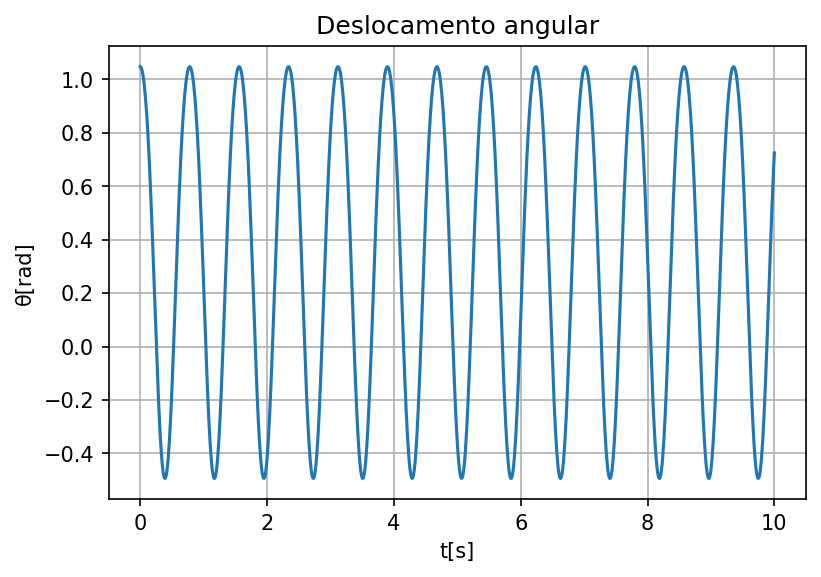

In [36]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(tn,X[:,0])
plt.xlabel('t[s]')
plt.ylabel(chr(952)+'[rad]')
plt.title('Deslocamento angular')
plt.grid(True)

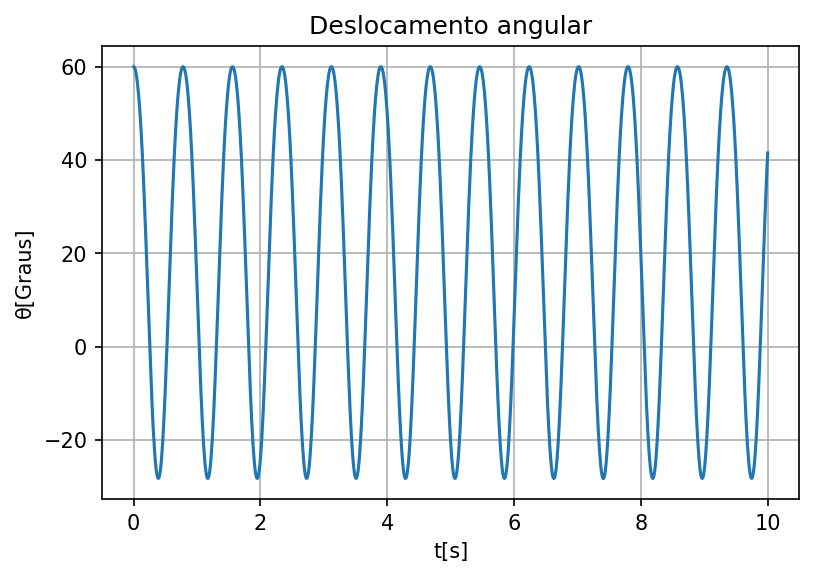

In [37]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(tn,(180/np.pi)*X[:,0])
plt.xlabel('t[s]')
plt.ylabel(chr(952)+'[Graus]')
plt.title('Deslocamento angular')
plt.grid(True)

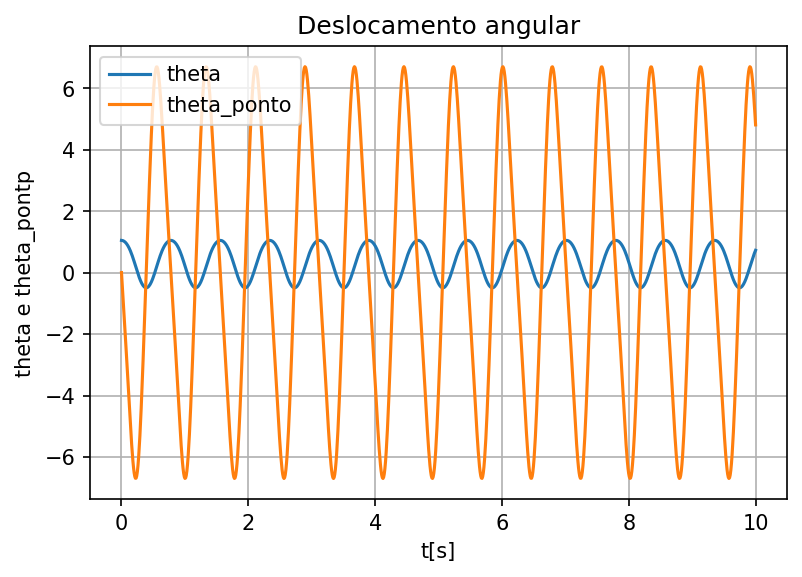

In [38]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(tn,X)
plt.xlabel('t[s]')
plt.ylabel('theta e theta_pontp')
plt.title('Deslocamento angular')
plt.legend(['theta','theta_ponto'])
plt.grid(True)

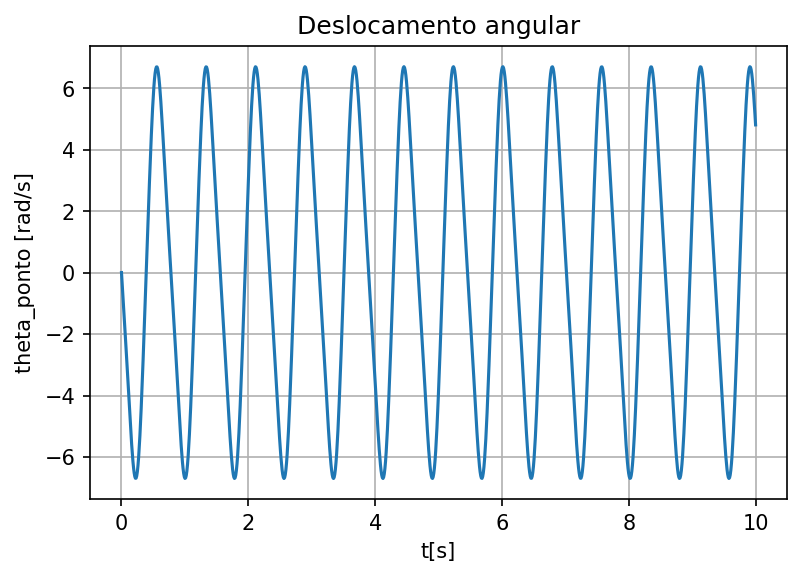

In [39]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(tn,X[:,1])
plt.xlabel('t[s]')
plt.ylabel('theta_ponto [rad/s]')
plt.title('Deslocamento angular')
plt.grid(True)

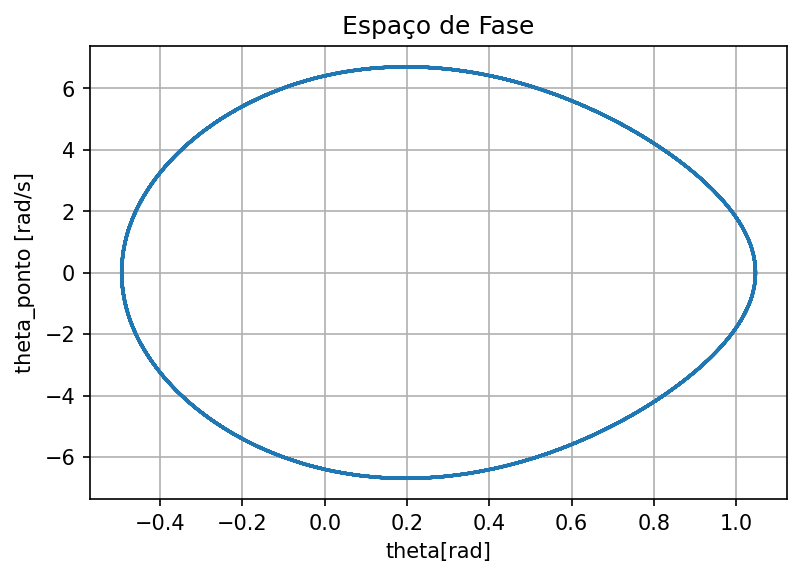

In [40]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(X[:,0],X[:,1])
plt.xlabel('theta[rad]')
plt.ylabel('theta_ponto [rad/s]')
plt.title('Espaço de Fase')
plt.grid(True)